In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import matplotlib as mpl

We want to conduct pheWAS on the 30 alleles found in the BMA analysis.

In [2]:
big_table = pd.read_table('../manuscript/complete_add_gen_aic.tsv')

In [3]:
phewas_alleles = list(np.unique(pd.read_table('../manuscript/bma_post_prob_sig_literature.tsv')['allelotype']))
phewas_alleles

['A*01:01',
 'A*26:08',
 'B*07:02',
 'B*08:01',
 'B*27:02',
 'B*27:05',
 'B*39:01',
 'B*39:06',
 'B*40:01',
 'B*57:01',
 'C*06:02',
 'DPA1*02:01',
 'DPB1*04:01',
 'DQA1*01:01',
 'DQA1*01:02',
 'DQA1*01:03',
 'DQA1*03:01',
 'DQA1*05:01',
 'DQB1*02:01',
 'DQB1*03:01',
 'DQB1*03:02',
 'DQB1*03:03',
 'DQB1*05:01',
 'DQB1*05:03',
 'DRB1*01:03',
 'DRB1*04:01',
 'DRB1*04:04',
 'DRB1*13:01',
 'DRB3*99:01',
 'DRB4*01:01']

In [4]:
add_p = big_table['add_p']
add_unadj_p = big_table['add_unadj_p']

We check that there is good concordance between BY-adjusted and unadjusted $p$-values below.

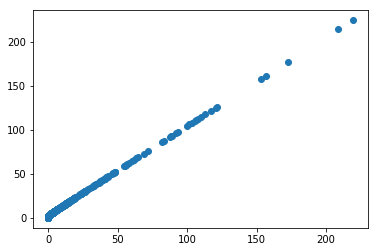

In [5]:
plt.scatter(-np.log10(add_p), -np.log10(add_unadj_p))

We grab the association results for our 30 alleles, aggregating the number of significant (BY-adjusted p $\leq$ 0.05) associations per allele and plotting them in a bar-plot.

In [6]:
table_subset = big_table[big_table['allelotype'].isin(phewas_alleles)]
by_threshold = table_subset[table_subset['add_p'] <= 0.05]
by_counts = by_threshold.groupby('allelotype').count().sort_values(by='phenotype', ascending=False)[['phenotype']]#.reset_index(level=0, inplace=True)

We then go back to our association results and relax the threshold to nominal p $\leq$ 0.01, and 0.001. These are stored below.

In [7]:
larger_threshold = table_subset[table_subset['add_unadj_p'] <= 1e-2]
larger_counts = larger_threshold.groupby('allelotype').count().sort_values(by='phenotype', ascending=False)[['phenotype']]#.reset_index(level=0, inplace=True)
smaller_threshold = table_subset[table_subset['add_unadj_p'] <= 1e-3]
smaller_counts = smaller_threshold.groupby('allelotype').count().sort_values(by='phenotype', ascending=False)[['phenotype']]#.reset_index(level=0, inplace=True)

We repeat the plotting procedure (placed side-by-side here for convenience) to see which alleles are most impacted by the relaxation of the threshold.

In [8]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(60, 20), dpi=450)
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 0.01, 1])

####################################################################################################
#FIRST GRAPH

ax = fig.add_subplot(gs[0, 0])

colors = {'A*01:01': 'lightcoral', 
          'A*26:08': 'sandybrown', 
          'B*07:02': 'blanchedalmond', 
          'B*08:01': 'darkgoldenrod', 
          'B*27:02': 'olivedrab', 
          'B*27:05': 'mediumseagreen', 
          'B*39:01': 'turquoise', 
          'B*39:06': 'powderblue', 
          'B*40:01': 'cornflowerblue', 
          'B*57:01': 'mediumpurple', 
          'C*06:02': 'orchid',
          'DPA1*02:01': 'darkorchid',
          'DPB1*04:01': 'plum',
          'DQA1*01:01': 'skyblue',
          'DQA1*01:02': 'slateblue',
          'DQA1*01:03': 'rebeccapurple',
          'DQA1*03:01': 'deeppink',
          'DQA1*05:01': 'crimson',
          'DQB1*02:01': 'springgreen',
          'DQB1*03:01': 'darkseagreen',
          'DQB1*03:02': 'midnightblue',
          'DQB1*03:03': 'thistle',
          'DQB1*05:01': 'lightpink',
          'DQB1*05:03': 'tomato',
          'DRB1*01:03': 'lightsalmon',
          'DRB1*04:01': 'rosybrown',
          'DRB1*04:04': 'paleturquoise',
          'DRB1*13:01': 'mistyrose',
          'DRB3*99:01': 'mediumturquoise',
          'DRB4*01:01': 'cadetblue'}

ax.barh(by_counts.reset_index()['allelotype'], by_counts['phenotype'], color=[colors[i] for i in by_counts.reset_index()['allelotype']], height=1, alpha=0.7)

ax.set_title('BY_p <= 0.05', size=20)
ax.set_ylabel('Allelotype', size=15)
ax.set_xlabel('Number of Total Significant Phenotype Associations', size=15)
ax.set_xlim(0,50)

ax.grid(axis='x', ls='--')
ax.grid(axis='y', b=None)

####################################################################################################
#SECOND GRAPH

ax = fig.add_subplot(gs[0, 1])

ax.barh(smaller_counts.reset_index()['allelotype'], smaller_counts['phenotype'], color=[colors[i] for i in smaller_counts.reset_index()['allelotype']], height=1, alpha=0.7)

ax.set_title('nom_p <= 0.001', size=20)
ax.set_ylabel('Allelotype', size=15)
ax.set_xlabel('Number of Total Significant Phenotype Associations', size=15)
ax.set_xlim(0,50)

ax.grid(axis='x', alpha=0.5, ls='--')
ax.grid(axis='y', b=None)

####################################################################################################
#THIRD GRAPH

ax = fig.add_subplot(gs[0, 3])

ax.barh(larger_counts.reset_index()['allelotype'], larger_counts['phenotype'], color=[colors[i] for i in larger_counts.reset_index()['allelotype']], height=1, alpha=0.7)

ax.set_title('nom_p <= 0.01', size=20)
ax.set_ylabel('Allelotype', size=15)
ax.set_xlabel('Number of Total Significant Allelotype Associations', size=15)
ax.set_xlim(0,50)
ax.grid(axis='x', alpha=0.5, ls='--')
ax.grid(axis='y', b=None)

#####################################################################################################
#TEXT LABELS

# t = fig.text(0.11, 0.9, 'a', weight='bold', size=50)
# t = fig.text(0.37, 0.9, 'b', weight='bold', size=50)
# t = fig.text(0.63, 0.9, 'c', weight='bold', size=50)
plt.savefig("phewas.png", dpi=450)
plt.show()

In [21]:
(smaller_counts - by_counts).sort_values(by='phenotype',ascending=False)#.merge(larger_counts - by_counts).merge(larger_counts-smaller_counts)

,phenotype
allelotype,
A*01:01,10
DRB1*04:01,9
B*08:01,8
DQB1*05:01,8
DQA1*05:01,8
DQB1*02:01,7
DQA1*01:02,7
DQA1*01:01,5
DRB4*01:01,5


In [16]:
(larger_counts - by_counts).sort_values(by='phenotype', ascending=False)

,phenotype
allelotype,
DQB1*02:01,30
B*08:01,28
DQA1*05:01,23
DQA1*01:02,21
DRB1*04:01,20
A*01:01,18
B*07:02,18
DQA1*03:01,16
DQB1*05:01,15


In [17]:
(larger_counts - smaller_counts).sort_values(by='phenotype', ascending=False)

,phenotype
allelotype,
DQB1*02:01,23
B*08:01,20
DQA1*05:01,15
B*07:02,14
DQA1*01:02,14
DQA1*03:01,12
DQB1*03:02,12
DRB1*04:01,11
DQB1*03:01,11


In [27]:
list(larger_threshold[larger_threshold['allelotype'] == 'DQB1*02:01']['description'])

['testicular_problems_(not_cancer)',
 'anaemia',
 'connective_tissue_disorder',
 'rosacea',
 'multiple_sclerosis',
 'gastro-oesophageal_reflux_(gord)_/_gastric_reflux',
 'diabetic_eye_disease',
 'sarcoidosis',
 'iron_deficiency_anaemia',
 'cellulitis',
 'ulcerative_colitis',
 'hypothyroidism/myxoedema',
 'osteoporosis',
 'diabetes',
 'abnormal_smear_(cervix)',
 'inguinal_hernia',
 'cataract',
 'high_cholesterol',
 'other_joint_disorder',
 'renal/kidney_failure',
 'carpal_tunnel_syndrome',
 'malabsorption/coeliac_disease',
 'hiatus_hernia',
 "sjogren's_syndrome/sicca_syndrome",
 'systemic_lupus_erythematosis/sle',
 'duodenal_ulcer',
 'allergy/hypersensitivity/anaphylaxis',
 'osteoarthritis',
 'psoriasis',
 'asthma',
 'peripheral_vascular_disease',
 'lichen_planus',
 'pancreatitis',
 'bladder_problem_(not_cancer)',
 'ankylosing_spondylitis',
 'hepatitis',
 'chronic_obstructive_airways_disease/copd',
 'hayfever/allergic_rhinitis',
 'hyperthyroidism/thyrotoxicosis',
 'appendicitis',
 'enla